# Topic:- PULSAR STAR DETECTION
<br><br>

### Project By:-

Deep Doshi - 1171074<br>
Soham Gadhave - 1711077
<br><br>
## Abstract
<strong>Pulsars</strong> are a rare type of <strong>Neutron Star</strong> that produce radio emission detectable here on Earth.
They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter .<br>
Neutron stars are very dense, and have short, regular rotational periods.<br>
This produces a very precise interval between pulses that ranges from milliseconds to seconds for an individual pulsar.<br>
Pulsars are believed to be one of the candidates for the source of <strong>ultra-high-energy cosmic rays.</strong><br>

This project aims at classifying these potential candidates  as <strong>pulsar</strong> or <strong>non-pulsar stars</strong>.

<br><br>

## Attribute Information:
Each candidate is described by 8 continuous variables, and a single class variable.<br>
The first four are simple statistics obtained from the integrated pulse profile (folded profile).<br>
This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency .<br>

Pulsars produce preiodic pulsation signals, often too weak to detect.<br>
<strong>Fold / Integrated pulsars</strong> signals with respect to its rotational period and that increases the signal quality and form the <strong>Integrated Pulse Profile</strong>.<br>
Pulsar stars are distinguished by their integrated pulse profiles.

The remaining four variables are similarly obtained from the <strong>DM-SNR curve</strong>.

DM is called the <strong>"Dispersion Measure"</strong> and increases with distance and electron density between Earth and pulsar and is measured in units of <strong>parsecs per cubic centimetre</strong> (a distance and an electron density)

<strong>SNR (Signal to Noise Ratio)</strong> describes the strength of a signal compared to the random noise.

Thus <strong>DM-SNR curve</strong> describes the noise and signal strengths of the dispersion measure.


<br><br>

<span style="color:red"><strong>NOTE</strong>:- This part contains only the <strong>Data Cleaning and Exploration</strong> part since the project was getting lengthy and having the entire project within a single notebook might have been unmanageable.</style>

# Part 1: Data Wrangling & Exploration

In [1]:
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt
from IPython.core.display import display, HTML

# Notebook settings
display(HTML("<style>.container { width:95% !important; }</style>"))
sns.set(style = "white", palette = "deep")
%matplotlib inline

## Table Of Contents

1. [Exploration](#Exploration)
    - [Reading In The Data](#Reading-In-The-Data)
    - [Overview](#Overview)


2. [Data Wrangling](#Data-Wrangling)
    - [Renaming Columns](#Renaming-Columns)


3. [Visualizations](#Visualizations)
    - [Hist Function](#Hist-Function)
    - [Histograms](#Histograms)
    - [Bar Plots](#Bar-Plots)
    - [Heat Map](#Heat-Map)

## Exploration

### Reading In The Data

In [3]:
pulsar = pd.read_csv("../Data/pulsar_stars.csv")

### Overview of the Data

In [4]:
# Checking the shape of the dataset.

print(f"The shape of the pulsar dataframe is {pulsar.shape[0]} rows by {pulsar.shape[1]} columns.")

The shape of the pulsar dataframe is 17898 rows by 9 columns.


In [5]:
pulsar.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
pulsar.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


In [7]:
# Checking for null values
from pprint import pprint
pprint(pulsar.isnull().sum())

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


In [9]:
# Checking the data's info such as number of null columns and data type supported by each column.

pulsar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [10]:
# Statistical description of numeric columns

pulsar.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


## Data Wrangling

### Renaming Columns

The dataset contains columns with very long names which makes it harder to write code specific to the columns.<br>
Thus the columns names will be modified to some short forms to make it easier to write codes 

In [11]:
# Renaming the columns

pulsar = pulsar.rename({" Mean of the integrated profile": "mean_ip",
                        " Standard deviation of the integrated profile": "sd_ip",
                        " Excess kurtosis of the integrated profile": "ex_kurt_ip",
                        " Skewness of the integrated profile": "skew_ip",
                        " Mean of the DM-SNR curve": "mean_dmsnr",
                        " Standard deviation of the DM-SNR curve": "sd_dmsnr",
                        " Excess kurtosis of the DM-SNR curve": "ex_kurt_dmsnr",
                        " Skewness of the DM-SNR curve": "skew_dmsnr",
                        " target_class": "target"}, axis = 1)

In [12]:
pulsar.head(2)

,mean_ip,sd_ip,ex_kurt_ip,skew_ip,mean_dmsnr,sd_dmsnr,ex_kurt_dmsnr,skew_dmsnr,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


These changes should be put to effect when we develop a keras model for pulsar star classification.<br>
Thus this data needs to be saved to some file.

In [13]:
pulsar.to_csv("../Data/pulsar_cleaned.csv", 
              index = False)

[Top](#Table-Of-Contents)

## Visualizations

### Hist Function

In [20]:
# Plotting histograms

def plot_histograms(columns, titles, labels, ticks):
    
    # The location determines the location of the chart within the grid
    location = 0
    fig   = plt.figure(figsize = (14,12))
    
    # Looping through each column in the list to graph enumerating allows us to index the other lists
    for c, column in enumerate(columns):
        
        # Changing the location
        location += 1
        ax    = fig.add_subplot(4, 2, location)
        
        # Plotting and setting parameters for the graph
        plt.title(f"Distribution Of {titles[c]}", size = 18)
        sns.distplot(pulsar[column], color = "black", kde = True)
        plt.axvline(pulsar[column].mean(), color = "red")
        plt.xlabel(f"{labels[c]}", size = 16)
        plt.ylabel("Frequency", size = 16)
        plt.xticks(ticks = ticks[c], size = 14)
        plt.yticks(size = 14)
    plt.tight_layout()
    plt.show();

### Histograms

A histogram is an approximate representation of the distribution of numerical or categorical data.

The vertical red lines in the histograms indicates the mean of the data.

#### Histograms Of The Integrated Profile

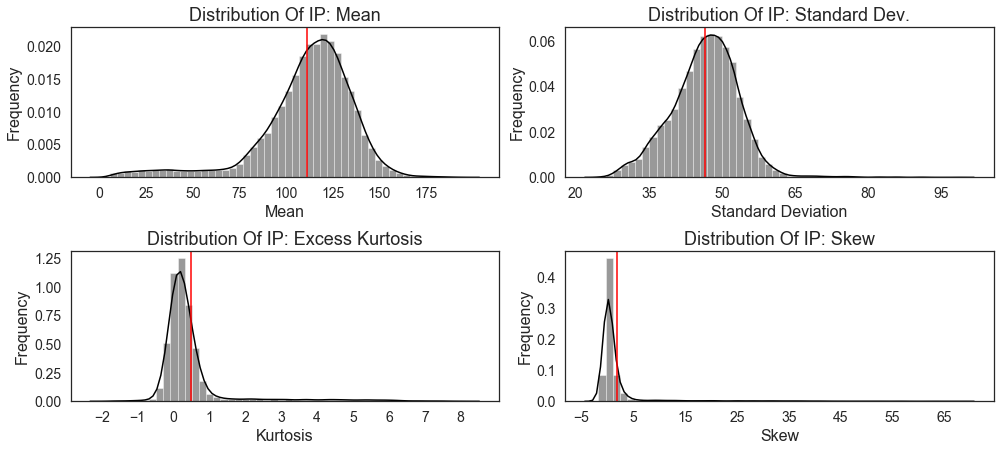

In [22]:
plot_histograms(columns = ["mean_ip", "sd_ip", "ex_kurt_ip", "skew_ip"],
                titles  = ["IP: Mean", "IP: Standard Dev.", "IP: Excess Kurtosis", "IP: Skew"],
                labels  = ["Mean", "Standard Deviation", "Kurtosis", "Skew"],
                ticks   = [np.arange(0,200,25), np.arange(20,100,15), np.arange(-2,9,1), np.arange(-5,70,10)])

The `Mean` and `Standard Deviation` distributions are close to being <strong>Normally Distributed</strong>.

This can probably used in feature engineering i.e. they may be more normal if they are squared.

But these distributions are <strong>Left Tailed</strong>. The `Mean` is very much <strong>Long Left Tailed</strong>.

The `Kurtosis` distrubution is somewhat normal but the problem is that it lies between <strong>-1 and 1</strong>.<br>
If the values are squared then that will drastically alter the distribution by putting all the new values in the range of <strong>0 to 1</strong>.

The same applies on the distribution of `Skew`.

#### Histograms Of The DM-SNR Curve

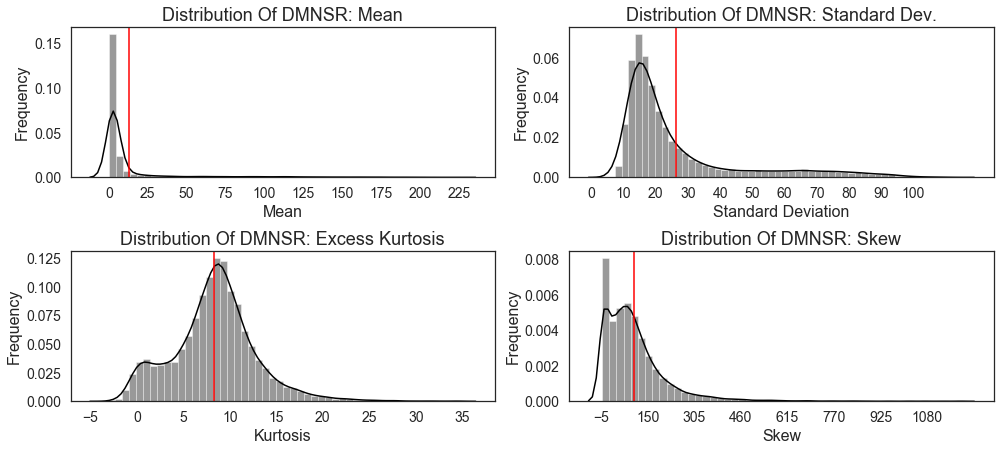

In [23]:
plot_histograms(columns = ["mean_dmsnr", "sd_dmsnr", "ex_kurt_dmsnr", "skew_dmsnr"],
                titles  = ["DMNSR: Mean", "DMNSR: Standard Dev.", "DMNSR: Excess Kurtosis", "DMNSR: Skew"],
                labels  = ["Mean", "Standard Deviation", "Kurtosis", "Skew"],
                ticks   = [np.arange(0,250,25), np.arange(0,110, 10), np.arange(-5,40,5), np.arange(-5,1200, 155)])

These plots seems like they can be log-normal in nature, but they actually are not because of the anture of their distributions.

Both `Mean` and `Standard Deviation` have <strong>Long Right Tail</strong> which actually prevents it from having a perfect normal distribution.

`Kurtosis` also is very much assymetric though it looks close to a normal distribution.

### Bar Plots

The only column that can be plotted with a bar plot is the target column.  The plot will be used again later to determine the baseline accuracy when modeling.

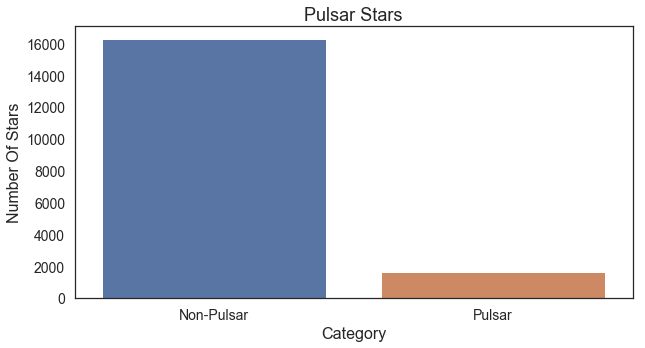

In [17]:
tick_labels = ["Non-Pulsar", "Pulsar"]

plt.figure(figsize = (10,5))
sns.countplot(pulsar["target_class"])
plt.title("Pulsar Stars", size = 18)
plt.xlabel("Category", size = 16)
plt.ylabel("Number Of Stars", size = 16)
plt.xticks(np.arange(0,2,1), 
           labels = tick_labels, 
           size = 14)
plt.yticks(size = 14);

The data is extremely unbalanced, which needs to be dealt with when the model will be developed for classification task.

### Heat Map

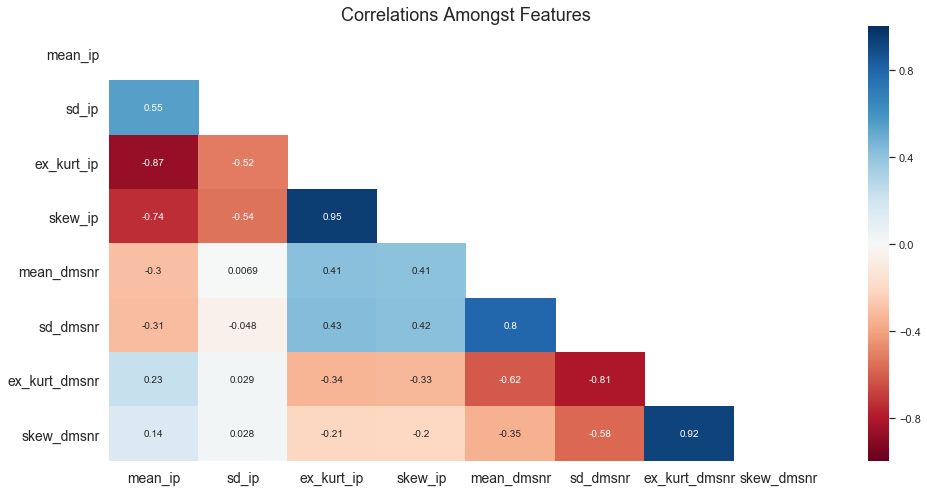

In [24]:
columns = pulsar.columns[:8]

plt.figure(figsize   = (16,8), facecolor = "white")
plt.title("Correlations Amongst Features", size = 18)
corr = pulsar[columns].corr()
mask = np.zeros_like(corr)                                                                                
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, cmap = "RdBu", mask = mask, vmin = -1, vmax = 1, annot = True)
plt.xticks(size = 14)
plt.yticks(size = 14);

One of the most notable features of this heat map is that there are four distinct blocks of correlation:

- `mean_ip` and `sd_ip` with `ex_kurt_ip` and `skew_ip`


- `ex_kurt_ip` and `skew_ip` with `mean_dmsnr` and `sd_dmsnr`


- `mean_dmsnr` and `sd_dmsnr` with `ex_kurt_dmsnr` and `skew_dmsnr`


- `ex_kurt_ip` and `skew_ip` with `ex_kurt_dmsnr` and `skew_dmsnr`


We may be able to use some of these correlations in feature engineering to create interaction columns.